# Portfolio Correlations

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [18]:
# download s&p 500 data as far back as available
sp500 = yf.download('^GSPC', start='2000-01-01', end='2022-09-01')
# rename adjusted close column to sp500 close
sp500.rename(columns={'Adj Close': 'sp500'}, inplace=True)
# download tlt data as far back as available
tlt = yf.download('TLT', start='2000-01-01', end='2022-09-01')
# rename adjusted close column to tlt close
tlt.rename(columns={'Adj Close': 'tlt'}, inplace=True)
# dowload oil data as far back as available
oil = yf.download('CL=F', start='2000-01-01', end='2022-09-01')
# rename adjusted close column to oil close
oil.rename(columns={'Adj Close': 'oil'}, inplace=True)
# download dxy data as far back as available
dxy = yf.download('DXY', start='2000-01-01', end='2022-09-01')
# rename adjusted close column to dxy close
dxy.rename(columns={'Adj Close': 'dxy'}, inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
# combine the datasets by date
data = pd.concat([sp500, tlt, oil, dxy], axis=1)
# drop rows with missing data
data.dropna(inplace=True)
# only look at sp500, tlt, oil, and dxy
data = data[['sp500', 'tlt', 'oil', 'dxy']]
data

,sp500,tlt,oil,dxy
Date,,,,
2006-01-03,1268.800049,55.401325,63.139999,5066.720215
2006-01-04,1273.459961,55.534096,63.419998,5101.470215
2006-01-05,1273.479980,55.467697,62.790001,5214.959961
2006-01-06,1285.449951,55.365063,64.209999,5214.959961
2006-01-09,1290.150024,55.401325,63.500000,5268.620117
...,...,...,...,...
2020-04-22,2799.310059,163.038910,13.780000,731.580017
2020-04-23,2797.800049,163.904373,16.500000,737.590027
2020-04-24,2836.739990,164.289062,16.940001,725.619995


In [20]:
# calculate rolling correlations between the stocks
data['sp500_tlt'] = data['sp500'].rolling(window=30).corr(data['tlt'])
data['sp500_oil'] = data['sp500'].rolling(window=30).corr(data['oil'])
data['sp500_dxy'] = data['sp500'].rolling(window=30).corr(data['dxy'])
data['tlt_oil'] = data['tlt'].rolling(window=30).corr(data['oil'])
data['tlt_dxy'] = data['tlt'].rolling(window=30).corr(data['dxy'])
data['oil_dxy'] = data['oil'].rolling(window=30).corr(data['dxy'])

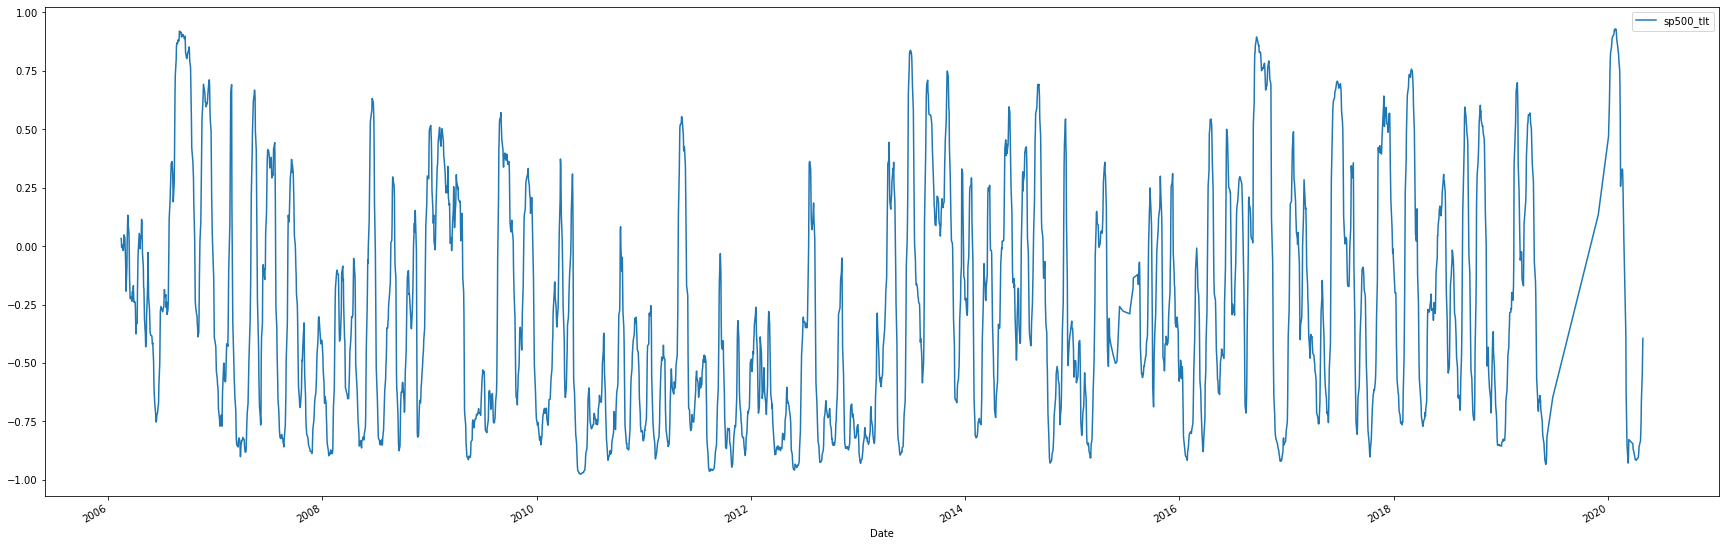

In [21]:
# plot the correlations
data[['sp500_tlt']].plot(figsize=(30,10))
plt.show()

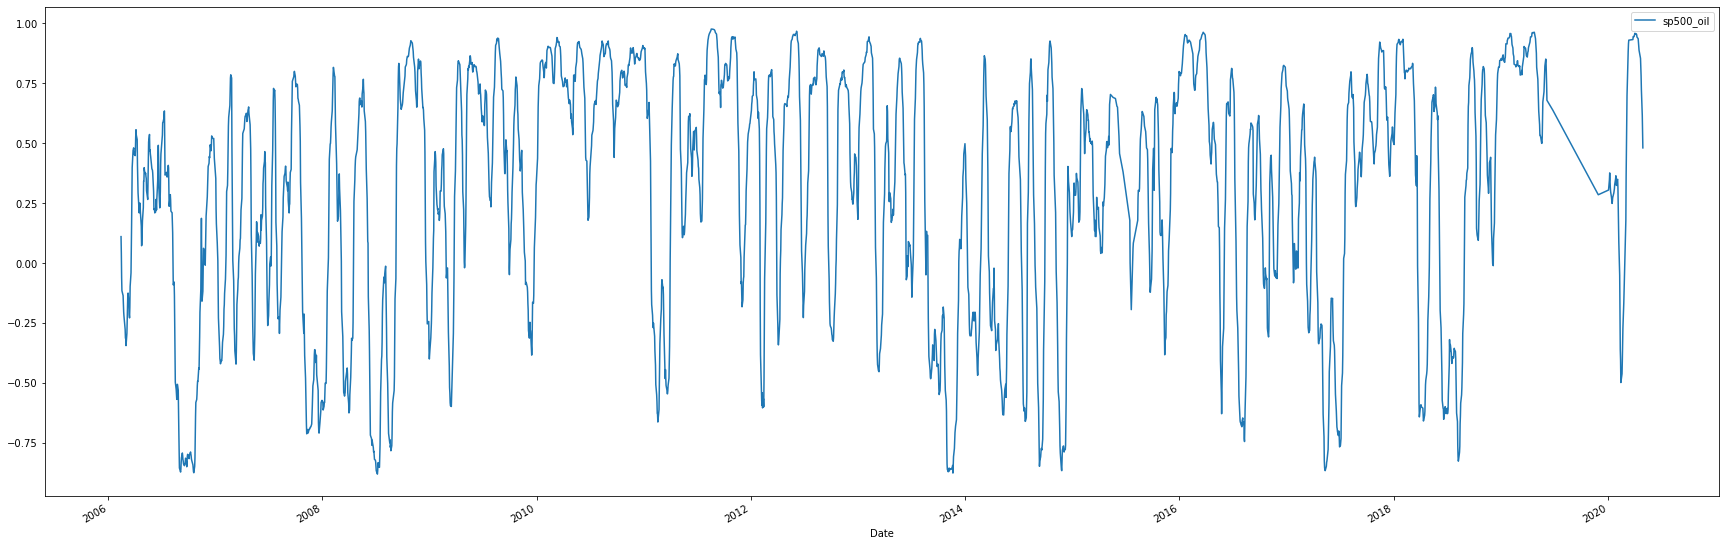

In [22]:
data[['sp500_oil']].plot(figsize=(30,10))
plt.show()

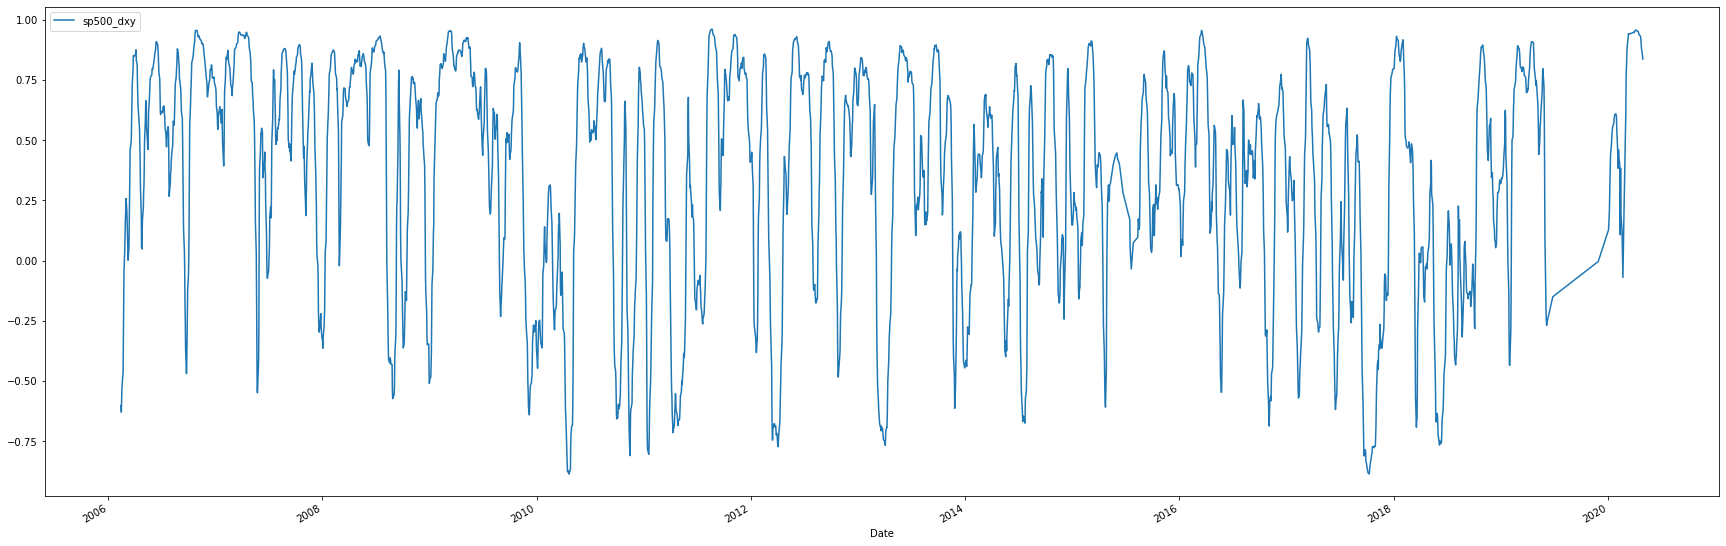

In [23]:

data[['sp500_dxy']].plot(figsize=(30,10))
plt.show()

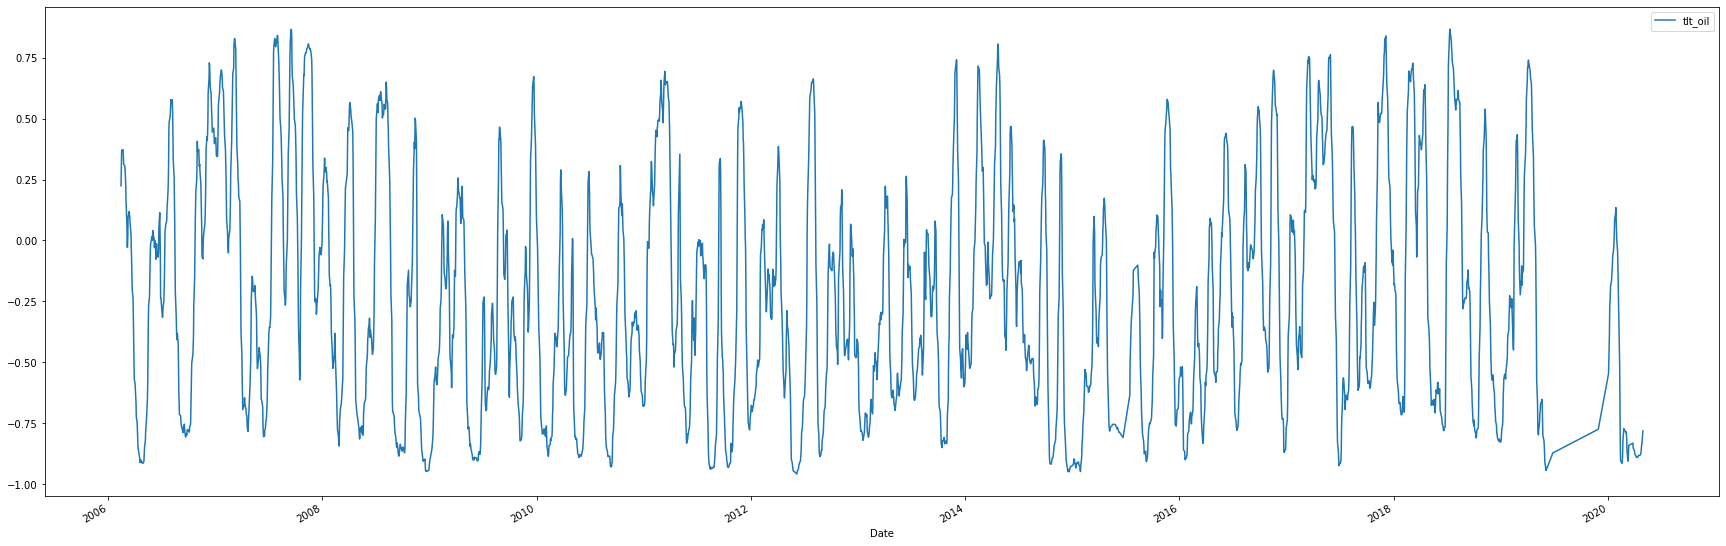

In [24]:

data[['tlt_oil']].plot(figsize=(30,10))
plt.show()

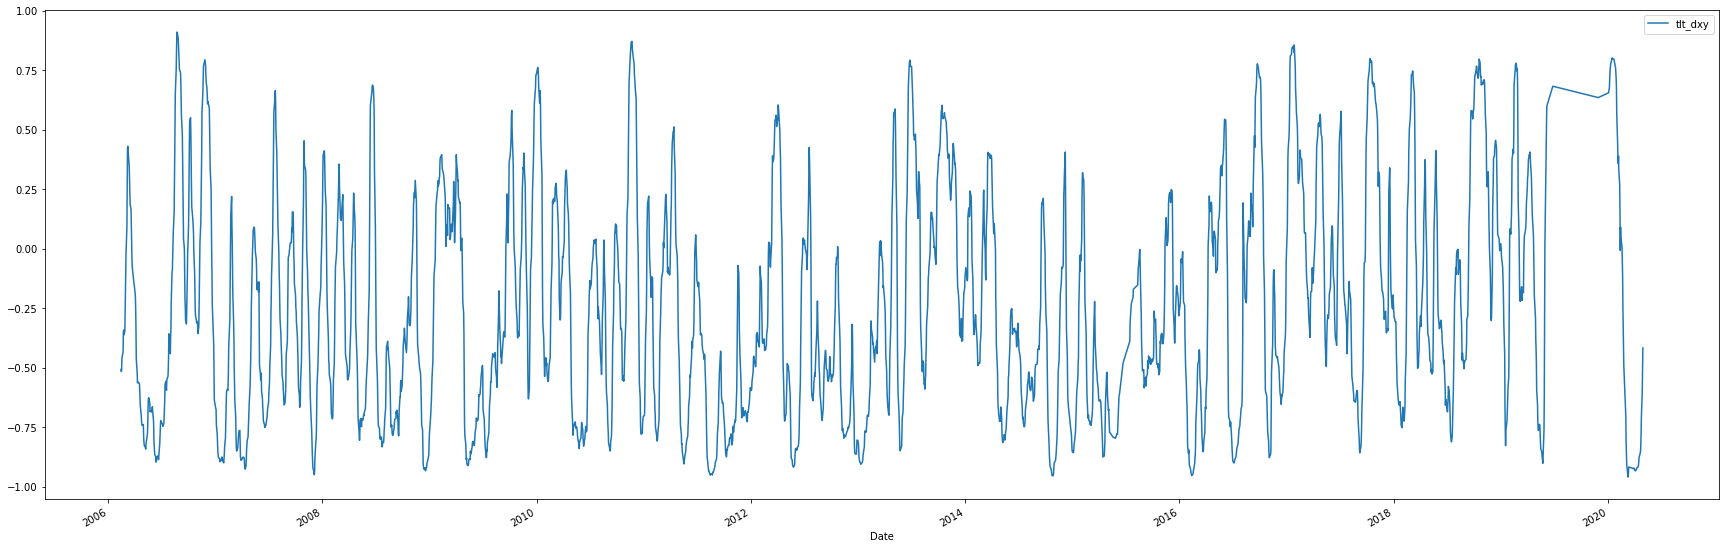

In [25]:

data[['tlt_dxy']].plot(figsize=(30,10))
plt.show()

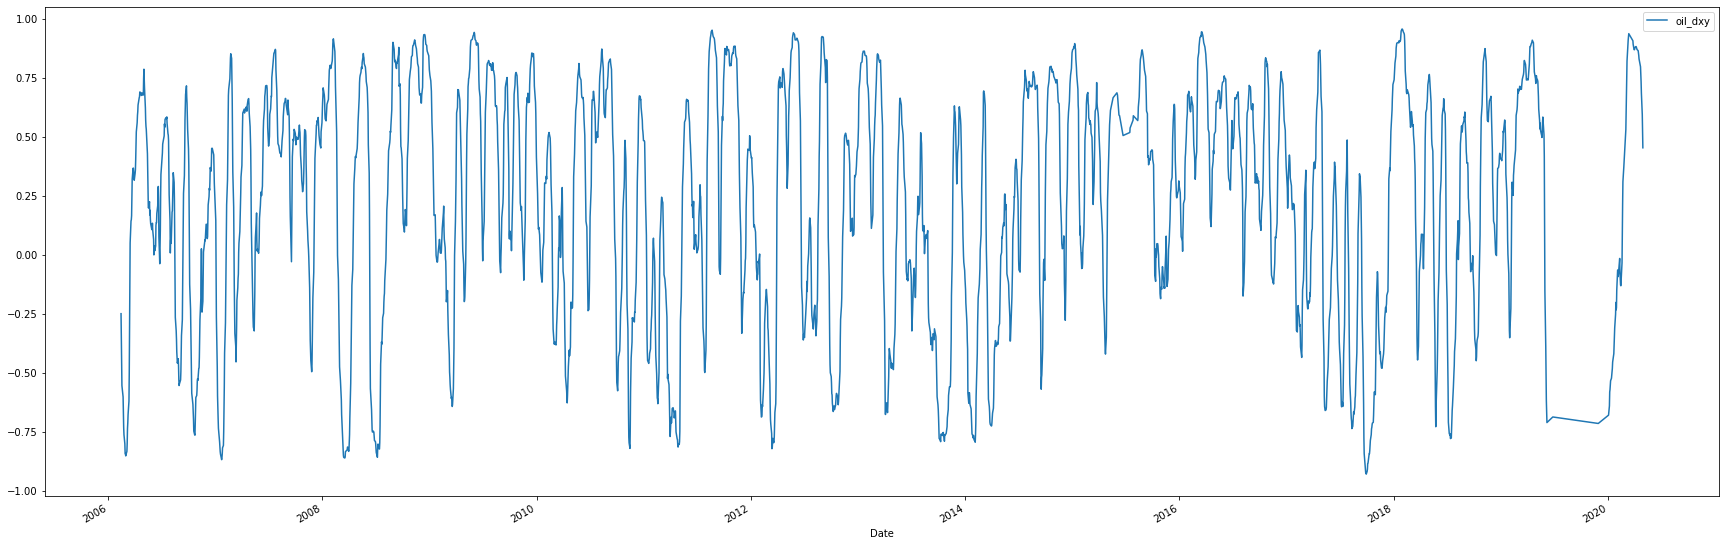

In [26]:

data[['oil_dxy']].plot(figsize=(30,10))
plt.show()